In [2]:
#_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Input PY modules and FACTS module names/data
#
WHOSRUN     = 'Bob'
#
%run ./T3_IP_modules.ipynb 
#
modNO       = np.arange(0,4)   # Number of workflows
#modNO=np.arange(1)
SCENARIO    = ['ssp126', 'ssp245', 'ssp585'];  
#
# P-A.      
df_TEMP      = []
        
# Loop over scenario. 
for val in modNO:
    for scenario in SCENARIO: 
        #
        # ........................................................................................
        #MODULE      = df.loc[val].at['Module']
        SUB_MODULE  = df_WF.loc[val].at['sub_Module']
        #
        # Skip if data is absent.
        if df_WF.loc[val].at['O/P_Data'] == 'XXX':
           continue 
        # 
        # Pick the data files. (Need to resolve the localhost naming)
        if scenario == 'ssp585':
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}.localhost/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.localhost.'.format(arg1=scenario) + df_WF.loc[val].at['O/P_Data']
        else:
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.'.format(arg1=scenario) + df_WF.loc[val].at['O/P_Data']
        #   
        dataPATH   = dataFOLDER+dataFILE
        #
        # Print to check the nc file details.
        print_nc = 0;    print_var = 0
        # 
        # IMPORT .nc data
        %run ./T3_IP_ncDATA.ipynb   #I/P data
        # ........................................................................................
        #
        # Loop over year
        for yy in yrs:
            # Find year index to pick SLC value
            Yind    = np.where(yrs == yy)[0][0]
            GMSL    = slc[:,Yind,0]
            #
            # Find Percentile ranges.
            percentList = [50, 5, 17, 83, 95]
            #
            pcntle = np.percentile(GMSL[:], percentList ); 
            pcntle = np.around(pcntle,2)
            #
            temp = [SUB_MODULE, scenario, yy, ] + pcntle.tolist()
            df_TEMP.append( temp )
# Group the W_F column
res = pd.DataFrame( df_TEMP, columns=['W_F', 'SSP', 'Year', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] ) # .set_index(['W_F','SSP'])
res
# df_TEMP

<IPython.core.display.Javascript object>

,W_F,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,wf1e,ssp126,2020,52.0,42.00,46.00,58.00,63.00
1,wf1e,ssp126,2030,95.0,79.00,85.00,107.00,116.00
2,wf1e,ssp126,2040,136.0,108.00,120.00,155.00,172.00
3,wf1e,ssp126,2050,184.0,143.00,161.00,210.00,234.00
4,wf1e,ssp126,2060,228.0,176.00,197.00,262.00,289.00
...,...,...,...,...,...,...,...,...
103,wf2f,ssp585,2060,322.0,245.00,275.00,395.00,473.05
104,wf2f,ssp585,2070,420.0,318.95,357.00,516.00,624.00
105,wf2f,ssp585,2080,534.0,404.95,451.83,659.00,796.00
106,wf2f,ssp585,2090,660.0,502.90,558.83,822.17,991.10


In [3]:
# Find all for a particular year.
res1 = res.set_index( ['W_F', 'SSP'] )
res1[res1.Year == 2020]

# # Stats for each column.
# res.describe()

# # Group by.
# res.groupby('Year').agg( [np.mean, np.median] ).apply(lambda x:   f'mean: {x[0]: 2.2f},  median: {x[1]: 2.2f}' , axis=1  )

# # Stack commands.
# res.set_index( ['Year', 'SSP', 'W_F'] ).stack()

Year  col_50  col_5  col_17  col_83  col_95
W_F  SSP                                                
wf1e ssp126  2020    52.0  42.00    46.0    58.0    63.0
     ssp245  2020    52.0  42.00    46.0    58.0    63.0
     ssp585  2020    53.0  43.00    47.0    59.0    64.0
wf1f ssp126  2020    58.0  45.00    51.0    66.0    71.0
     ssp245  2020    58.0  44.95    50.0    65.0    70.0
     ssp585  2020    60.0  45.00    52.0    67.0    73.0
wf2e ssp126  2020    60.0  46.00    51.0    71.0    84.0
     ssp245  2020    60.0  46.00    51.0    71.0    84.0
     ssp585  2020    61.0  47.00    52.0    72.0    85.0
wf2f ssp126  2020    59.0  43.00    50.0    70.0    82.0
     ssp245  2020    58.0  43.00    49.0    69.0    81.0
     ssp585  2020    61.0  45.00    51.0    72.0    84.0

# Plot the GMSL for Work Flows and SSP's

#### Set Global figure def

In [33]:
%matplotlib inline
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
#
# Initialize the grid
grid = plt.GridSpec(3, 5, wspace=0.4, hspace=0.3)
#
# Global
xlim  = [2010,2100]
ylim = [0 , 1500]
xlim1 = [.1,2]
#

#### Color Scheme

In [5]:
# Colors updated to match updated SPM colors
color_ssp119 = np.array([0, 173,207])/255
color_ssp126 = np.array([23  ,60 ,  102])/255
color_ssp245 = np.array([247 ,148,  32])/255
color_ssp370 = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255
# scencolors=[color_SSP585, color_SSP370, color_SSP245, color_SSP126, color_SSP119]
scencolors=[color_ssp585, color_ssp245, color_ssp126]
scencolors1 = list(reversed(scencolors))


#### Define Axis

In [6]:
# get the years.
Xax1 = res.loc[:,"Year"].unique()
#
SSP = res.loc[:,"SSP"].unique()
WORKFLO = res.loc[:,"W_F"].unique()
#
#Yax = res.loc[((res["W_F"] == 'wf1e') & (res['SSP'] == 'ssp126')),"col_50" ]


#### Plot Graph (single Subplot)

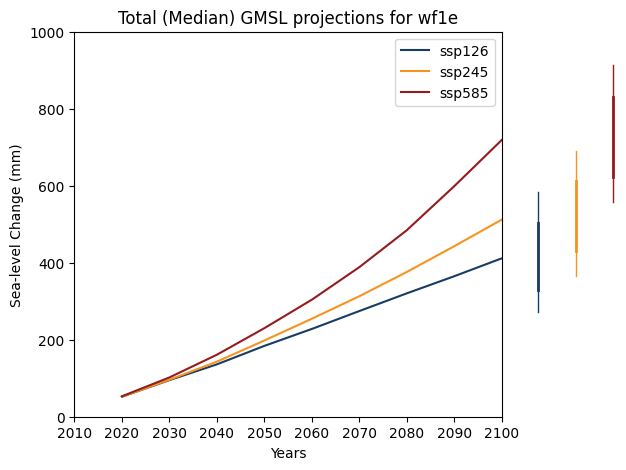

In [50]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
#
grid = plt.GridSpec(1, 5, wspace=0.4, hspace=0.3)
# make subplots
ax1 = plt.subplot(grid[0, :4])
ax2 = plt.subplot(grid[0, 4])
#
# X axis for the Right (Bar) Plots
Xax2 = np.array([[.2,.2]]) 
#
#
WORKFLO = 'wf1e'    # for ww in WORKFLO
for ss in SSP: # Loop through each SSP
    #
    # Plot Left
    Yax1 = res.loc[((res["W_F"] == WORKFLO) & (res['SSP'] == ss)),"col_50" ] 
    ax1.plot(Xax1, Yax1, label = ss, color = eval(f'color_{ss}'))
    #
    # Plot Right
    Yax2_1 = res.loc[((res["W_F"] == WORKFLO) & (res['SSP'] == ss) & (res['Year'] == 2100)),("col_5", "col_95") ].values
    Yax2_2 = res.loc[((res["W_F"] == WORKFLO) & (res['SSP'] == ss) & (res['Year'] == 2100)),("col_17", "col_83") ].values 
    #
    ax2.plot(Xax2.transpose(), Yax2_1.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=1)
    ax2.plot(Xax2.transpose(), Yax2_2.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=2)
    Xax2 = Xax2+.2
    #
ax1.legend(); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
ax1.set_title("Total (Median) GMSL projections for " + WORKFLO); ax1.set_xlabel("Years"); ax1.set_ylabel("Sea-level Change (mm)")
#
ax2.set_ylim(ylim); ax2.axis('off') #ax2.set_xlim(xlim);
plt.show()

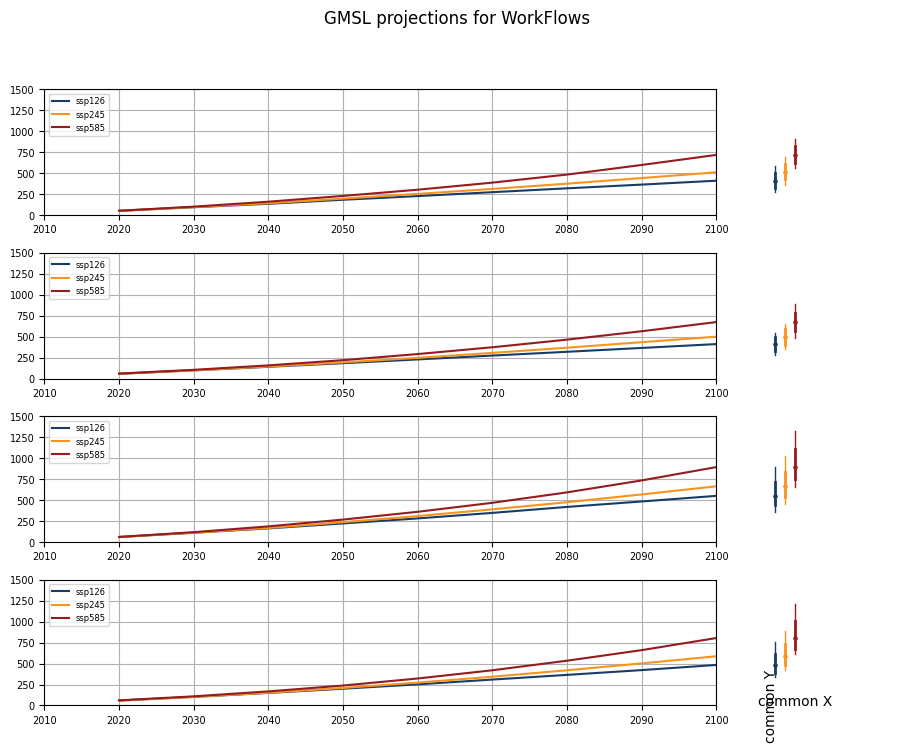

In [57]:
plt.rcParams.update({'figure.figsize':(11,8), 'figure.dpi':100})
#
grid = plt.GridSpec(4, 5, wspace=0.4, hspace=0.3)
#
# Specify subplot Axis.
ax1_wf1e = plt.subplot(grid[0, :4]); ax2_wf1e = plt.subplot(grid[0, 4]);
ax1_wf1f = plt.subplot(grid[1, :4]); ax2_wf1f = plt.subplot(grid[1, 4]);
ax1_wf2e = plt.subplot(grid[2, :4]); ax2_wf2e = plt.subplot(grid[2, 4]);
ax1_wf2f = plt.subplot(grid[3, :4]); ax2_wf2f = plt.subplot(grid[3, 4]);
#
#
#
for ww in WORKFLO:
    # Select subplot axis based on workflow
    ax1 = eval(f'ax1_{ww}')
    ax2 = eval(f'ax2_{ww}')
    #
    # X axis for the Right (Bar) Plots
    Xax2 = np.array([[.2,.2]]) 
    #
    for ss in SSP: # Loop through each SSP
        #
        # Plot Left
        Yax1 = res.loc[((res["W_F"] == ww) & (res['SSP'] == ss)),"col_50" ] 
        ax1.plot(Xax1, Yax1, label = ss, color = eval(f'color_{ss}'))
        #
        # Plot Right
        Yax2_1 = res.loc[((res["W_F"] == ww) & (res['SSP'] == ss) & (res['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = res.loc[((res["W_F"] == ww) & (res['SSP'] == ss) & (res['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = res.loc[((res["W_F"] == ww) & (res['SSP'] == ss) & (res['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(Xax2.transpose(), Yax2_1.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=1,)
        ax2.plot(Xax2.transpose(), Yax2_2.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=2)
        ax2.plot(Xax2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{ss}'),ms = 2,mfc='none')
        Xax2 = Xax2+.15
        #
    ax1.tick_params(axis='both', labelsize=7)
    ax1.legend(loc='upper left',prop={'size': 6}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.grid()
    # ax1.set_title("Total (Median) GMSL projections for " + ww); ax1.set_xlabel("Years"); ax1.set_ylabel("Sea-level Change (mm)")
    #
    ax2.set_ylim(ylim); ax2.axis('off') 
    ax2.set_xlim(xlim1);
    #
plt.suptitle('GMSL projections for WorkFlows') 
plt.supxlabel('common x label')
plt.supylabel('common y label')
plt.show()

In [58]:
plt

<module 'matplotlib.pyplot' from '/home/pk695/000_swre/miniconda/envs/facts37/lib/python3.7/site-packages/matplotlib/pyplot.py'>